# 미술관과 코로나 19 확진자 수 간의 상관분석

- 상관분석 : 두 변수 간에 어떤 선형적 또는 비선형적 관계를 갖고 있는지 분석하는 방법
- 상관관계 : 두 변수 간의 관계의 강도
- 상관계수 : 상관관계의 정도를 파악하는 것, 두 변수 간의 연관된 정보를 나타낼 뿐 인과 관계를 설명하는 것은 아님 

- 상관계수가 0인 경우 : 두 변수간의 관계가 없다

- 미술관 20년 1-9월, 21년 1-9월 관람객수와 코로나19 확진자 수 간의 상관분석

In [2]:
import pandas as pd

In [48]:
# skiprows 로 원하지 않는 행 제거
art_df_20 = pd.read_excel('미술관, 박물관 상관분석.xlsx', sheet_name='미술관 통계(20-21)', skiprows = [0])
art_df_21 = pd.read_excel('미술관, 박물관 상관분석.xlsx', sheet_name='미술관 21', skiprows = [0])

In [49]:
art_df_20

,날짜,서울,과천,덕수궁,청주,합계,2020년 코로나 확진자 수
0,1월,106934,23328,57523,13866,201651,11
1,2월,54398,12226,19791,8914,95329,2920
2,3월,0,0,14125,0,14125,6855
3,4월,0,0,5328,0,5328,979
4,5월,44011,13049,4975,2822,64857,703
5,6월,0,0,0,4588,4588,1331
6,7월,22974,10126,2817,5785,41702,1506
7,8월,43278,24031,5478,7262,80049,5641
8,9월,6917,1585,682,246,9430,3865


# 2019 ~ 2021 해보기

In [71]:
test_df = pd.read_excel('미술관, 박물관 상관분석.xlsx', sheet_name='tt')
test_df

,서울,과천,덕수궁,청주,합계,코로나 확진자 수
0,135924,30457,30731,25433,222545,0
1,132627,24892,35214,20734,213467,0
2,145273,37644,18474,15629,217020,0
3,123512,80011,12633,9807,225963,0
4,133302,74466,816,12032,220616,0
5,115047,94656,44889,8944,263536,0
6,103714,41953,18548,11830,176045,0
7,116130,31398,24892,21303,193723,0
8,91818,58587,62432,17712,230549,0
9,96630,62685,61327,32619,253261,0


In [79]:
test_df.isna().sum()

서울           0
과천           0
덕수궁          0
청주           0
합계           0
코로나 확진자 수    0
dtype: int64

In [72]:
import matplotlib.pyplot as plt
import matplotlib 

In [73]:
plt.rcParams['font.family'] = 'NanumGothic'
matplotlib.rcParams['axes.unicode_minus'] = False

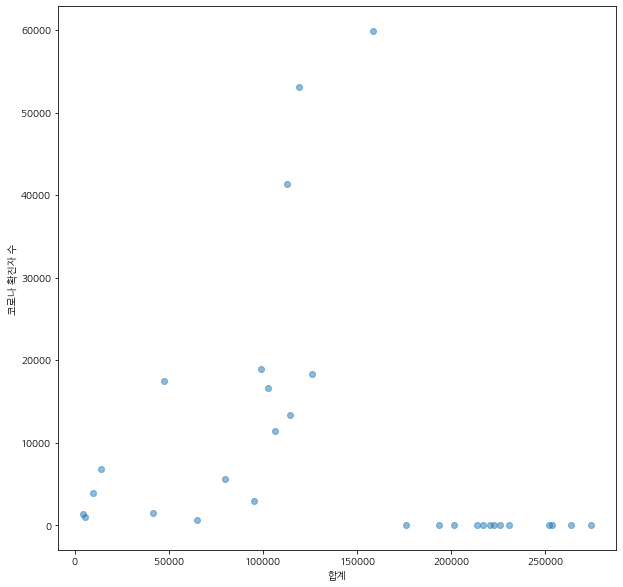

In [124]:
x = test_df['합계'].values
y = test_df['코로나 확진자 수'].values

plt.scatter(x, y, alpha = 0.5)
plt.xlabel('합계')
plt.ylabel('코로나 확진자 수')
plt.show()

In [76]:
# 피어슨 상관계수
corr = test_df.corr(method = 'pearson')
corr

,서울,과천,덕수궁,청주,합계,코로나 확진자 수
서울,1.000000,0.743052,0.518953,0.738380,0.936361,-0.147460
과천,0.743052,1.000000,0.490316,0.528319,0.849297,-0.216860
덕수궁,0.518953,0.490316,1.000000,0.725883,0.741052,-0.147811
청주,0.738380,0.528319,0.725883,1.000000,0.819089,-0.246178
합계,0.936361,0.849297,0.741052,0.819089,1.000000,-0.200515
코로나 확진자 수,-0.147460,-0.216860,-0.147811,-0.246178,-0.200515,1.000000


In [77]:
# 특정 필드에 대한 상관관계
test_df['합계'].corr(test_df['코로나 확진자 수'])

-0.2005148100480018

<AxesSubplot:>

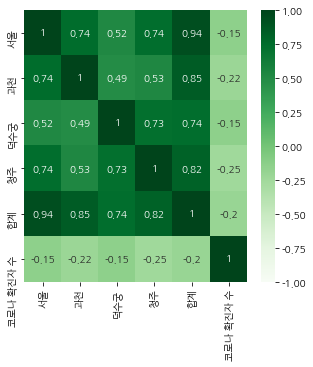

In [78]:
#heatmap으로 상관관계를 표시
import seaborn as sb

plt.rcParams["figure.figsize"] = (5,5)
sb.heatmap(test_df.corr(),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Greens', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
          )

- 지역별 미술관 관람객수와 코로나19 확진자 수 간의 상관분석

In [82]:
# 피어슨 상관계수
corr_20 = art_df_20.corr(method = 'pearson')
corr_20

,서울,과천,덕수궁,청주,합계,2020년 코로나 확진자 수
서울,1.000000,0.868593,0.837093,0.891383,0.991896,-0.356460
과천,0.868593,1.000000,0.547815,0.807293,0.850488,-0.114598
덕수궁,0.837093,0.547815,1.000000,0.746824,0.887932,-0.265744
청주,0.891383,0.807293,0.746824,1.000000,0.904468,-0.338669
합계,0.991896,0.850488,0.887932,0.904468,1.000000,-0.316220
2020년 코로나 확진자 수,-0.356460,-0.114598,-0.265744,-0.338669,-0.316220,1.000000


<AxesSubplot:>

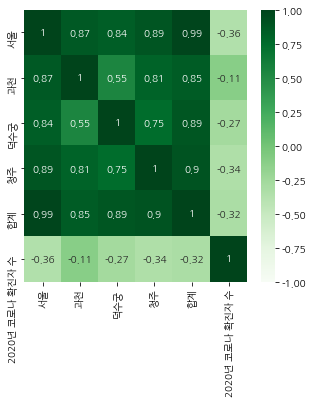

In [83]:
#heatmap으로 상관관계를 표시
import seaborn as sb

plt.rcParams["figure.figsize"] = (5,5)
sb.heatmap(art_df_20.corr(),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Greens', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
          )

In [89]:
# 특정 필드에 대한 상관관계
art_df_20['합계'].corr(art_df_20['2020년 코로나 확진자 수'])

-0.3162204005639777

In [84]:
# 피어슨 상관계수
corr_21 = art_df_21.corr(method = 'pearson')
corr_21

,서울,과천,덕수궁,청주,합계,2021년 코로나 확진자 수
서울,1.000000,0.705426,0.578874,0.534122,0.938415,0.541244
과천,0.705426,1.000000,0.363979,0.589081,0.730594,0.219573
덕수궁,0.578874,0.363979,1.000000,0.035645,0.804093,0.514361
청주,0.534122,0.589081,0.035645,1.000000,0.461462,0.428324
합계,0.938415,0.730594,0.804093,0.461462,1.000000,0.579286
2021년 코로나 확진자 수,0.541244,0.219573,0.514361,0.428324,0.579286,1.000000


<AxesSubplot:>

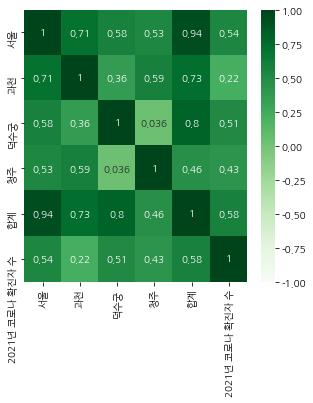

In [85]:
#heatmap으로 상관관계를 표시
import seaborn as sb

plt.rcParams["figure.figsize"] = (5,5)
sb.heatmap(art_df_21.corr(),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Greens', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
          )

In [88]:
# 특정 필드에 대한 상관관계
art_df_21['합계'].corr(art_df_21['2021년 코로나 확진자 수'])

0.5792859425739834

# 박물관과 코로나 19 확진자 수 간의 상관분석

In [95]:
# skiprows 로 원하지 않는 행 제거
m_df_20 = pd.read_excel('미술관, 박물관 상관분석.xlsx', sheet_name='박물관 통계(20-21)')
m_df_21 = pd.read_excel('미술관, 박물관 상관분석.xlsx', sheet_name='박물관 21')

In [98]:
m_df_20['날짜'] =  m_df_20['날짜'].astype(str)
m_df_21['날짜'] =  m_df_21['날짜'].astype(str)

In [109]:
m_df_20 = m_df_20.fillna(0)

In [111]:
# 특정 필드에 대한 상관관계
m_df_20['합계'].corr(m_df_20['2020년 코로나 확진자 수'])

-0.372248637311533

In [112]:
# 특정 필드에 대한 상관관계
m_df_21['합계'].corr(m_df_21['2021년 코로나 확진자 수'])

0.5236252388635971

<AxesSubplot:>

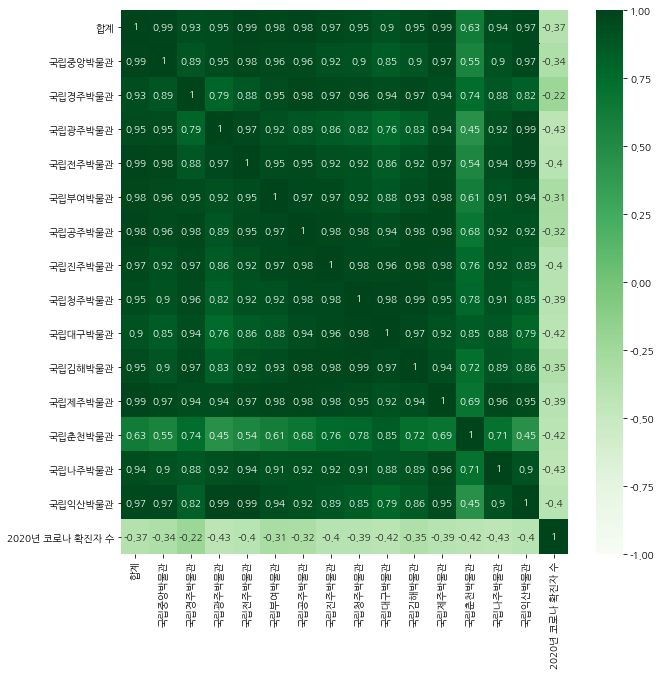

In [113]:
#heatmap으로 상관관계를 표시
import seaborn as sb

plt.rcParams["figure.figsize"] = (10,10)
sb.heatmap(m_df_20.corr(),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Greens', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
          )

<AxesSubplot:>

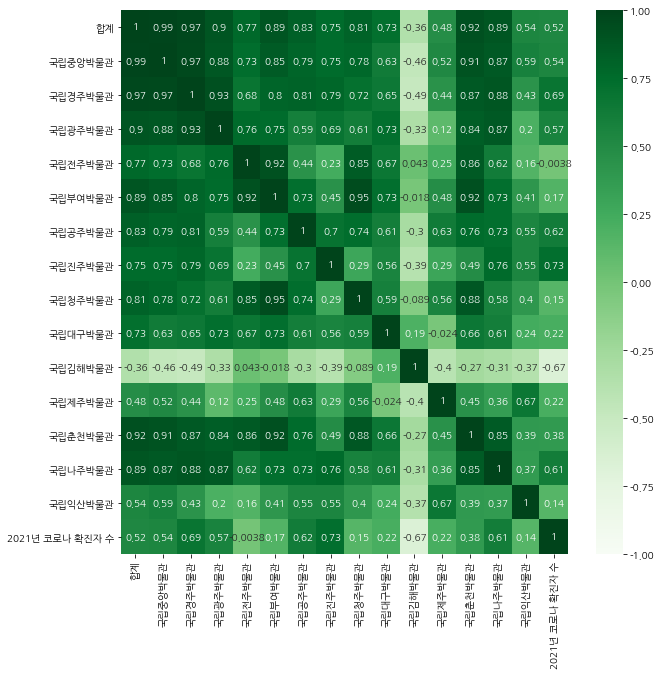

In [108]:
#heatmap으로 상관관계를 표시
import seaborn as sb

plt.rcParams["figure.figsize"] = (10,10)
sb.heatmap(m_df_21.corr(),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Greens', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
          )

In [121]:
m_df_20 = m_df_20.rename(columns={'2020년 코로나 확진자 수':'코로나 확진자 수'})
m_df_21 = m_df_21.rename(columns={'2021년 코로나 확진자 수':'코로나 확진자 수'})

In [122]:
t_df = pd.concat([m_df_20, m_df_21], axis= 0)
t_df

,날짜,합계,국립중앙박물관,국립경주박물관,국립광주박물관,국립전주박물관,국립부여박물관,국립공주박물관,국립진주박물관,국립청주박물관,국립대구박물관,국립김해박물관,국립제주박물관,국립춘천박물관,국립나주박물관,국립익산박물관,코로나 확진자 수
0,2020.01,978208,309829.0,99804.0,43899.0,48871.0,42393.0,36122.0,24199.0,27327.0,56781.0,34298.0,25380.0,14011.0,8565.0,206729.0,11
1,2020.02,285890,79101.0,33327.0,14245.0,10160.0,20105.0,10264.0,9638.0,5100.0,14409.0,8883.0,9046.0,4386.0,2017.0,65209.0,2920
2,2020.03,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6855
3,2020.04,284,284.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,979
4,2020.05,151984,49832.0,13910.0,4587.0,3380.0,5963.0,4219.0,5940.0,5143.0,18437.0,3248.0,5968.0,13180.0,2194.0,15983.0,703
5,2020.06,132919,890.0,25331.0,6436.0,5645.0,7361.0,6267.0,7107.0,8114.0,22200.0,9901.0,6218.0,10849.0,3502.0,13098.0,1331
6,2020.07,212586,42515.0,37950.0,86.0,6370.0,10251.0,11553.0,10526.0,12248.0,32569.0,16100.0,5820.0,11211.0,922.0,14465.0,1506
7,2020.08,346274,96310.0,70440.0,4669.0,10320.0,19131.0,17384.0,11872.0,13191.0,31875.0,16831.0,10401.0,13125.0,3177.0,27548.0,5641
8,2020.09,28110,13084.0,317.0,293.0,205.0,758.0,650.0,665.0,309.0,7602.0,674.0,1096.0,616.0,128.0,1713.0,3865
0,2021.01,128251,36213.0,16335.0,4743.0,1217.0,6589.0,6340.0,258.0,4866.0,18434.0,6676.0,7249.0,5155.0,782.0,13394.0,17471


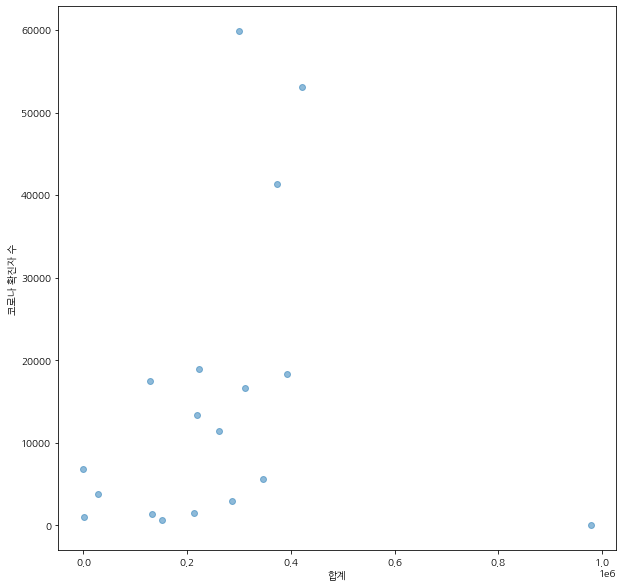

In [125]:
x = t_df['합계'].values
y = t_df['코로나 확진자 수'].values

plt.scatter(x, y, alpha = 0.5)
plt.xlabel('합계')
plt.ylabel('코로나 확진자 수')
plt.show()

In [128]:
# 특정 필드에 대한 상관관계
t_df['합계'].corr(t_df['코로나 확진자 수'])

0.16783863164428992

<AxesSubplot:>

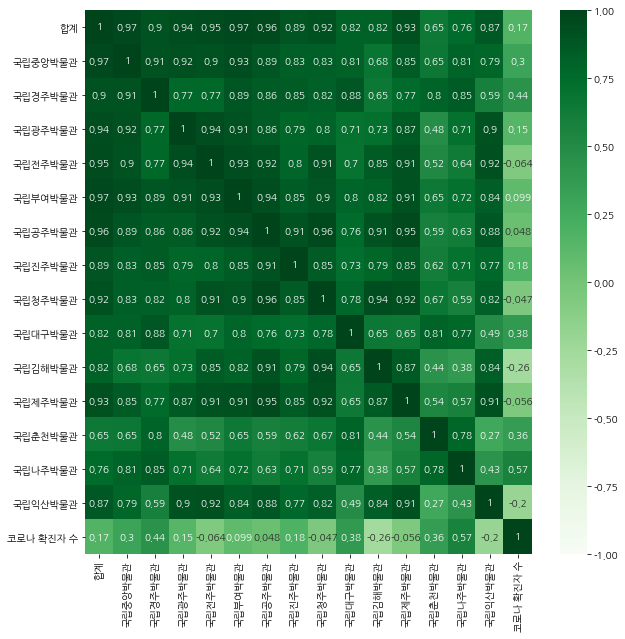

In [129]:
#heatmap으로 상관관계를 표시
import seaborn as sb

plt.rcParams["figure.figsize"] = (10,10)
sb.heatmap(t_df.corr(),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Greens', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
          )